In [61]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pycaret.datasets import get_data
from pycaret.classification import *

In [62]:
df = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [63]:
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [64]:
# Split the data and use randomForest as the model
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42,stratify=df['Class'])

In [65]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
# Test the model and print the matrix of confusion
from sklearn.metrics import confusion_matrix  
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[85,  4],
       [ 1, 47]], dtype=int64)

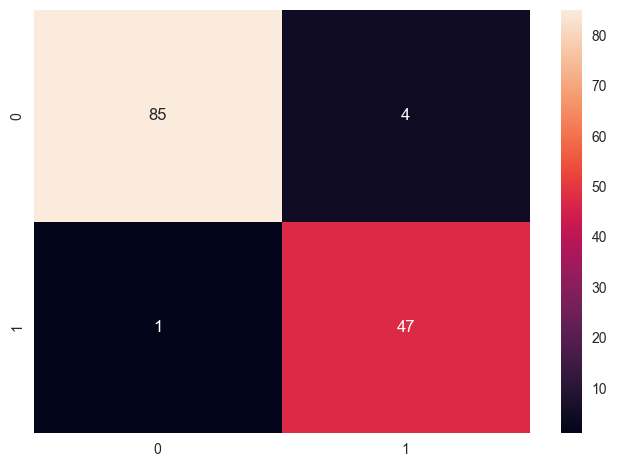

In [67]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

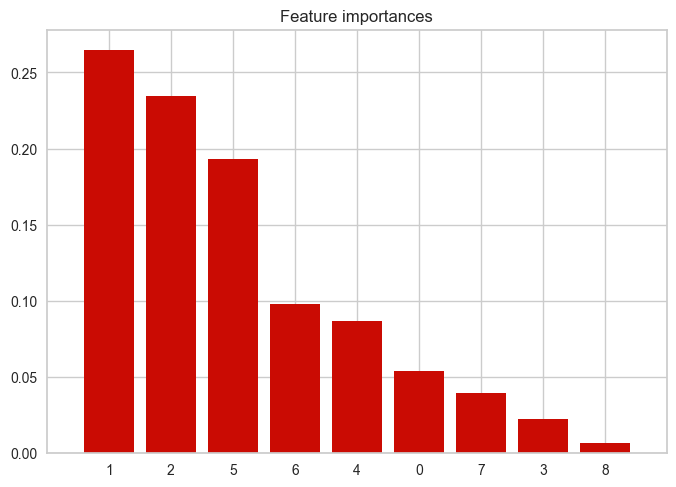

In [68]:
# Plot features importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [69]:
# Print the 10 most important features with the name of the column
columns_importance = []
importance_list = []
for f in range(0,4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), df.columns[indices[f]])
    columns_importance.append(df.columns[indices[f]])
    importance_list.append(importances[indices[f]])
    
    

1. feature 1 (0.264771) age
2. feature 2 (0.234274) menopause
3. feature 5 (0.192888) node-caps
4. feature 6 (0.097884) deg-malig


In [70]:
np.sum(importance_list)

0.789816106736133

In [71]:
columns_importance.append('Class')

In [72]:
df = df[columns_importance]

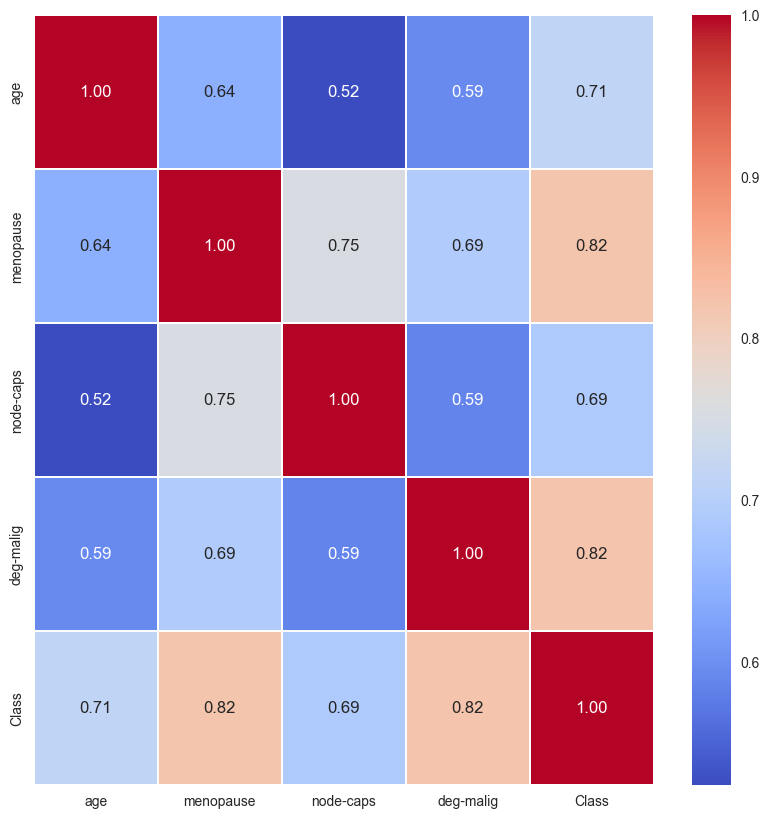

In [73]:
# Plot a correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.show()

In [74]:
df.describe()

,age,menopause,node-caps,deg-malig,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.234261,3.544656,0.349927
std,2.820761,3.065145,2.223085,3.643857,0.477296
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,0.000000
75%,6.000000,5.000000,4.000000,6.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,1.000000


In [75]:
df.columns

Index(['age', 'menopause', 'node-caps', 'deg-malig', 'Class'], dtype='object')

In [76]:
df.head()

,age,menopause,node-caps,deg-malig,Class
0,5,1,2,1,0
1,5,4,7,10,0
2,3,1,2,2,0
3,6,8,3,4,0
4,4,1,2,1,0


In [77]:
df.dtypes

age          int64
menopause    int64
node-caps    int64
deg-malig    int64
Class        int64
dtype: object

In [81]:
# Print accuraccy in test and train
print('Accuracy of RF classifier on training set: {:.2f}'
        .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))


Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.96


In [59]:
clf1 = setup(data = df,target='Class', session_id=123, silent=True, log_experiment=True, experiment_name='automl_demo_breast_1',fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(683, 5)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [60]:
# model training
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9539,0.9872,0.9522,0.9188,0.9347,0.8992,0.9001,4.7510
knn,K Neighbors Classifier,0.9520,0.9791,0.9581,0.9095,0.9331,0.8956,0.8964,0.0560
lda,Linear Discriminant Analysis,0.9519,0.9841,0.9585,0.9088,0.9326,0.8953,0.8965,0.0280
catboost,CatBoost Classifier,0.9519,0.9870,0.9401,0.9247,0.9316,0.8945,0.8955,2.3360
ridge,Ridge Classifier,0.9498,0.0000,0.9585,0.9041,0.9300,0.8910,0.8925,0.0310
svm,SVM - Linear Kernel,0.9476,0.0000,0.9151,0.9329,0.9233,0.8835,0.8842,0.0180
rf,Random Forest Classifier,0.9457,0.9871,0.9283,0.9172,0.9224,0.8806,0.8810,0.4000
nb,Naive Bayes,0.9436,0.9745,0.8919,0.9435,0.9161,0.8737,0.8753,0.0310
ada,Ada Boost Classifier,0.9435,0.9752,0.9151,0.9222,0.9182,0.8750,0.8755,0.1190
gbc,Gradient Boosting Classifier,0.9414,0.9863,0.9221,0.9138,0.9164,0.8714,0.8731,0.1060


In [82]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [83]:
create_app(best_model)

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2b75e98d940>, 'http://127.0.0.1:7861/', None)